## CHATBOT FOR UNIVERSITY

## Importing Libraries

In [1]:
import nltk
#nltk.download('punkt') #to tokenize the word
#nltk.download('wordnet') 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [2]:
import json
import pickle
import string
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import random
from sklearn.metrics import mean_squared_error

## Reading the dataset

In [4]:
words = []
classes = []
documents =[]
data_file = open('intents1.txt',encoding='utf-8').read()
intents = json.loads(data_file)

In [5]:
# Setting seed for reproducibility
np.random.seed(123)
tf.random.set_seed(1234)

## Preprocessing

In [82]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        
        documents.append((w,intent['tag']))
        
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
            
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in string.punctuation]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print(len(documents), 'documents', documents)

print(len(classes), 'classes', classes)

print(len(words), 'unique lemmatized words', words)

pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))


438 documents [(['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Whats', 'up'], 'greeting'), (['how', 'are', 'ya'], 'greeting'), (['heyy'], 'greeting'), (['whatsup'], 'greeting'), (['cya'], 'goodbye'), (['see', 'you'], 'goodbye'), (['bye', 'bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['I', 'am', 'Leaving'], 'goodbye'), (['Bye'], 'goodbye'), (['Have', 'a', 'Good', 'day'], 'goodbye'), (['talk', 'to', 'you', 'later'], 'goodbye'), (['tyyl'], 'goodbye'), (['i', 'got', 'to', 'go'], 'goodbye'), (['gtg'], 'goodbye'), (['what', 'is', 'the', 'name', 'of', 'your', 'developers'], 'creator'), (['what', 'is', 'the', 'name', 'of', 'your', 'creators'], 'creator'), (['what', 'is', 'the', 'name', 'of', 'the', 'developers'], 'creator'), (['what', 'is', 'the', 'name', 'of', 'the', 'creators'], 'creator'), (['who', 'created', 'you'], 'creator'), (['your',

## Training data initialization

In [83]:
training = []
output_empty= [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
     
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
    
print(pattern_words)
print(bag)
print(output_row)

random.shuffle(training)
training = np.array(training)

#print(training)
#create train and test lists. X - patterns, Y - intents
x = list(training[:,0])
y = list(training[:,1])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=5)
print("Training data created")
print(len(x))
print(len(x[0]))
print(len(y))
print(len(y[0]))
print(len(y_test))
print(len(x_test))



['please', 'provide', 'sport', 'and', 'game', 'information']
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Training data created
438
174
438
19
66
66


<ipython-input-83-f7c3237f637b>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [86]:
print(bag)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Creating a sequential model

In [84]:
model = Sequential()
model.add(Dense(512, input_shape=(len(x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y[0]), activation='softmax'))

print(model.summary())

adam = Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 512)               89600     
                                                                 
 dropout_25 (Dropout)        (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 256)               131328    
                                                                 
 dropout_26 (Dropout)        (None, 256)               0         
                                                                 
 dense_50 (Dense)            (None, 19)                4883      
                                                                 
Total params: 225,811
Trainable params: 225,811
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
#fitting and saving the model
hist = model.fit(x_train, y_train, epochs=80, validation_data=(x_test, y_test), batch_size=8, verbose=1)

model.save('chatbot_model.h5', hist)

print("model created")

y_predict=model.predict(x)
rmse = (np.sqrt(mean_squared_error(y, y_predict)))

Epoch 1/80
24/24 [==============================] - 0s 8ms/step - loss: 2.9009 - accuracy: 0.1344 - val_loss: 2.8069 - val_accuracy: 0.3030
Epoch 2/80
24/24 [==============================] - 0s 3ms/step - loss: 2.6985 - accuracy: 0.2473 - val_loss: 2.6368 - val_accuracy: 0.2727
Epoch 3/80
24/24 [==============================] - 0s 3ms/step - loss: 2.4253 - accuracy: 0.3387 - val_loss: 2.4023 - val_accuracy: 0.3636
Epoch 4/80
24/24 [==============================] - 0s 3ms/step - loss: 2.0685 - accuracy: 0.4570 - val_loss: 2.0770 - val_accuracy: 0.5152
Epoch 5/80
24/24 [==============================] - 0s 3ms/step - loss: 1.7240 - accuracy: 0.6129 - val_loss: 1.7087 - val_accuracy: 0.6364
Epoch 6/80
24/24 [==============================] - 0s 3ms/step - loss: 1.3161 - accuracy: 0.7796 - val_loss: 1.4049 - val_accuracy: 0.7273
Epoch 7/80
24/24 [==============================] - 0s 3ms/step - loss: 0.9687 - accuracy: 0.8710 - val_loss: 1.1739 - val_accuracy: 0.7879
Epoch 8/80
24/24 [==

24/24 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.4745 - val_accuracy: 0.8485
Epoch 60/80
24/24 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.4849 - val_accuracy: 0.8182
Epoch 61/80
24/24 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.4600 - val_accuracy: 0.8485
Epoch 62/80
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.4599 - val_accuracy: 0.8182
Epoch 63/80
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4569 - val_accuracy: 0.8788
Epoch 64/80
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.4518 - val_accuracy: 0.8788
Epoch 65/80
24/24 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.4427 - val_accuracy: 0.8788
Epoch 66/80
24/24 [======

## Evaluating The Model

Performance of training data
RMSE is 0.037544482502606266




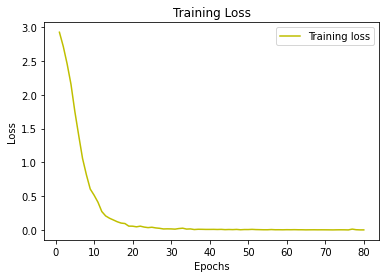

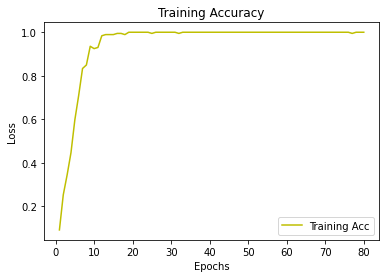

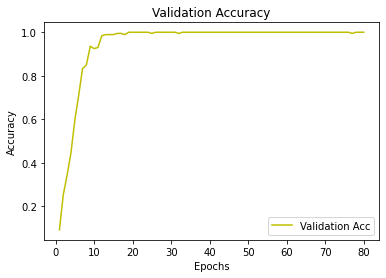

In [70]:
print("Performance of training data")
print("RMSE is {}".format(rmse))
print("\n")

loss = hist.history['loss']
#val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = hist.history["accuracy"]
#val_acc = hist.history["val_accuracy"]
plt.plot(epochs, acc, "y", label="Training Acc")
#plt.plot(epochs, val_acc, 'r', label = 'Validation Acc')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = hist.history['accuracy']
#val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, 'y', label="Validation Acc")
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# LSTM Model

In [71]:
# Defining Hyperparameters 

vocab_size = 6000     # Vocabulary size: the number of unique words
embedding_dim = 20    # Number of dimensions in embedding space fixed as 20
max_length = 174      # Maximum Length Sequence set as 174
trunc_type='post'     # Truncation type post: 0's will be added after numeric sequences
padding_type='post'   # Padding Type post: 0's will be added after numeric sequences
oov_tok = "<OOV>"     # token for Out of vocabulary words  

In [72]:
# Defining the LSTM model

lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),    #Embedding Layer 
    tf.keras.layers.LSTM(32),   #LSTM Layer with 32 output channels 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(len(y[0]), activation='softmax')             #Final output layer activated by softmax function
])

lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  #calculating loss and optimizing
lstm_model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 174, 20)           120000    
                                                                 
 lstm_16 (LSTM)              (None, 32)                6784      
                                                                 
 dense_41 (Dense)            (None, 256)               8448      
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 19)                4883      
                                                                 
Total params: 140,115
Trainable params: 140,115
Non-trainable params: 0
_________________________________________________________________


In [73]:
#fitting and saving the model

hist2 = lstm_model.fit(x_train, y_train, epochs=80, validation_data=(x_test, y_test), batch_size=8, verbose=1)

lstm_model.save('chatbot_model.h5', hist)

print("model created")

y_predict=lstm_model.predict(x)
rmse = (np.sqrt(mean_squared_error(y, y_predict)))

Epoch 1/80
24/24 [==============================] - 4s 76ms/step - loss: 2.9420 - accuracy: 0.0591 - val_loss: 2.9396 - val_accuracy: 0.0606
Epoch 2/80
24/24 [==============================] - 1s 58ms/step - loss: 2.9226 - accuracy: 0.1183 - val_loss: 2.9270 - val_accuracy: 0.0606
Epoch 3/80
24/24 [==============================] - 1s 58ms/step - loss: 2.8799 - accuracy: 0.1075 - val_loss: 2.9327 - val_accuracy: 0.0606
Epoch 4/80
24/24 [==============================] - 1s 57ms/step - loss: 2.8886 - accuracy: 0.1183 - val_loss: 2.9317 - val_accuracy: 0.0606
Epoch 5/80
24/24 [==============================] - 1s 56ms/step - loss: 2.8619 - accuracy: 0.1183 - val_loss: 2.9474 - val_accuracy: 0.0606
Epoch 6/80
24/24 [==============================] - 1s 59ms/step - loss: 2.8769 - accuracy: 0.1237 - val_loss: 2.9414 - val_accuracy: 0.0606
Epoch 7/80
24/24 [==============================] - 1s 56ms/step - loss: 2.8557 - accuracy: 0.1183 - val_loss: 2.9484 - val_accuracy: 0.0606
Epoch 8/80
24

24/24 [==============================] - 2s 63ms/step - loss: 1.9306 - accuracy: 0.3548 - val_loss: 3.0300 - val_accuracy: 0.1515
Epoch 59/80
24/24 [==============================] - 1s 57ms/step - loss: 1.9947 - accuracy: 0.3817 - val_loss: 3.0652 - val_accuracy: 0.1818
Epoch 60/80
24/24 [==============================] - 1s 58ms/step - loss: 1.9796 - accuracy: 0.3172 - val_loss: 3.0069 - val_accuracy: 0.1818
Epoch 61/80
24/24 [==============================] - 1s 57ms/step - loss: 1.8931 - accuracy: 0.3871 - val_loss: 3.0753 - val_accuracy: 0.1515
Epoch 62/80
24/24 [==============================] - 1s 57ms/step - loss: 1.8754 - accuracy: 0.3441 - val_loss: 3.0725 - val_accuracy: 0.1515
Epoch 63/80
24/24 [==============================] - 1s 58ms/step - loss: 1.8281 - accuracy: 0.3441 - val_loss: 3.1414 - val_accuracy: 0.1818
Epoch 64/80
24/24 [==============================] - 1s 59ms/step - loss: 1.8749 - accuracy: 0.3495 - val_loss: 3.0338 - val_accuracy: 0.2121
Epoch 65/80
24/24 

Performance of training data
RMSE is 0.18833271817331224




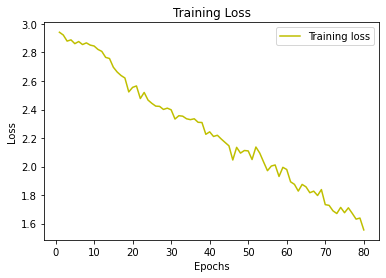

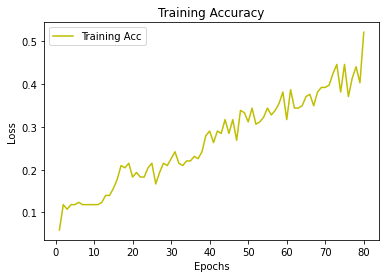

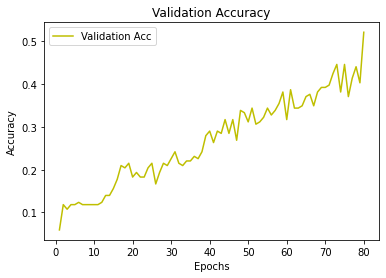

In [74]:
# Evaluating the model

print("Performance of training data")
print("RMSE is {}".format(rmse))
print("\n")

loss = hist2.history['loss']
#val_loss = hist2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = hist2.history["accuracy"]
#val_acc = hist2.history["val_accuracy"]
plt.plot(epochs, acc, "y", label="Training Acc")
#plt.plot(epochs, val_acc, 'r', label = 'Validation Acc')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = hist2.history['accuracy']
#val_acc = hist2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label="Validation Acc")
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Bi-directional LSTM Model

In [75]:
# Defining the LSTM model

lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),    #Embedding Layer 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),   #LSTM Layer with 32 output channels 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(len(y[0]), activation='softmax')             #Final output layer activated by softmax function
])

lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  #calculating loss and optimizing
lstm_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 174, 20)           120000    
                                                                 
 bidirectional_12 (Bidirecti  (None, 64)               13568     
 onal)                                                           
                                                                 
 dense_43 (Dense)            (None, 256)               16640     
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 19)                4883      
                                                                 
Total params: 155,091
Trainable params: 155,091
Non-trainable params: 0
_______________________________________________

In [76]:
#fitting and saving the model

hist3 = lstm_model.fit(x_train, y_train, epochs=80, validation_data=(x_test, y_test), batch_size=8, verbose=1)

lstm_model.save('chatbot_model.h5', hist)

print("model created")

y_predict=lstm_model.predict(x)
rmse = (np.sqrt(mean_squared_error(y, y_predict)))

Epoch 1/80
24/24 [==============================] - 5s 111ms/step - loss: 2.9384 - accuracy: 0.0806 - val_loss: 2.9384 - val_accuracy: 0.0606
Epoch 2/80
24/24 [==============================] - 2s 80ms/step - loss: 2.8984 - accuracy: 0.1183 - val_loss: 2.9551 - val_accuracy: 0.0606
Epoch 3/80
24/24 [==============================] - 2s 78ms/step - loss: 2.9011 - accuracy: 0.1183 - val_loss: 2.9396 - val_accuracy: 0.0606
Epoch 4/80
24/24 [==============================] - 2s 73ms/step - loss: 2.8490 - accuracy: 0.1183 - val_loss: 2.9709 - val_accuracy: 0.0606
Epoch 5/80
24/24 [==============================] - 2s 75ms/step - loss: 2.8498 - accuracy: 0.1183 - val_loss: 2.9631 - val_accuracy: 0.0606
Epoch 6/80
24/24 [==============================] - 2s 75ms/step - loss: 2.8724 - accuracy: 0.1183 - val_loss: 2.9491 - val_accuracy: 0.0606
Epoch 7/80
24/24 [==============================] - 2s 74ms/step - loss: 2.8519 - accuracy: 0.1183 - val_loss: 2.9586 - val_accuracy: 0.0606
Epoch 8/80
2

Epoch 59/80
24/24 [==============================] - 2s 76ms/step - loss: 0.9277 - accuracy: 0.6935 - val_loss: 3.1354 - val_accuracy: 0.2727
Epoch 60/80
24/24 [==============================] - 2s 78ms/step - loss: 0.9548 - accuracy: 0.6452 - val_loss: 3.2626 - val_accuracy: 0.3030
Epoch 61/80
24/24 [==============================] - 2s 83ms/step - loss: 0.9679 - accuracy: 0.6774 - val_loss: 3.2025 - val_accuracy: 0.3030
Epoch 62/80
24/24 [==============================] - 2s 80ms/step - loss: 0.9274 - accuracy: 0.6935 - val_loss: 3.3621 - val_accuracy: 0.3333
Epoch 63/80
24/24 [==============================] - 2s 81ms/step - loss: 0.9828 - accuracy: 0.6613 - val_loss: 3.3786 - val_accuracy: 0.2424
Epoch 64/80
24/24 [==============================] - 2s 81ms/step - loss: 0.9770 - accuracy: 0.6398 - val_loss: 3.2090 - val_accuracy: 0.2727
Epoch 65/80
24/24 [==============================] - 2s 85ms/step - loss: 0.9545 - accuracy: 0.6720 - val_loss: 3.1976 - val_accuracy: 0.2424
Epoch 

Performance of training data
RMSE is 0.13757681229096397




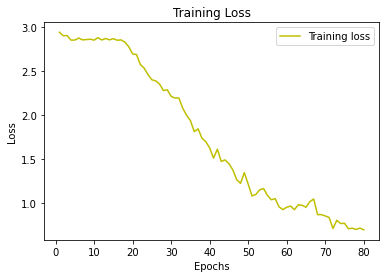

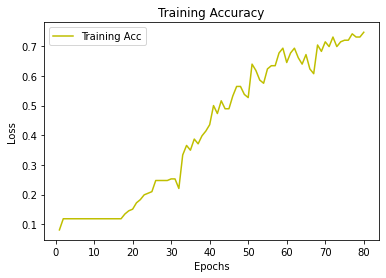

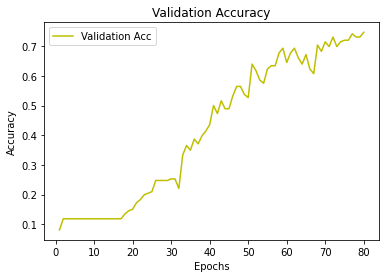

In [77]:
# Evaluating the model

print("Performance of training data")
print("RMSE is {}".format(rmse))
print("\n")

loss = hist3.history['loss']
#val_loss = hist2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = hist3.history["accuracy"]
#val_acc = hist3.history["val_accuracy"]
plt.plot(epochs, acc, "y", label="Training Acc")
#plt.plot(epochs, val_acc, 'r', label = 'Validation Acc')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = hist3.history['accuracy']
#val_acc = hist3.history['val_accuracy']
plt.plot(epochs, acc, 'y', label="Validation Acc")
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Comparing the three models

In [78]:
# Plotting comparison between 3 models

import pandas as pd
from pandas import DataFrame
accuracy = [max(hist.history['val_accuracy']),max(hist2.history['val_accuracy']),max(hist3.history['val_accuracy'])]
loss = [max(hist.history['val_loss']),max(hist2.history['val_loss']),max(hist3.history['val_loss'])]

col={'Accuracy':accuracy,'Loss':loss}
models=['NN','LSTM','Bi-LSTM']
graph_df=DataFrame(data=col,index=models)
graph_df

,Accuracy,Loss
NN,0.878788,2.827366
LSTM,0.272727,3.206015
Bi-LSTM,0.363636,3.528064


<AxesSubplot:>

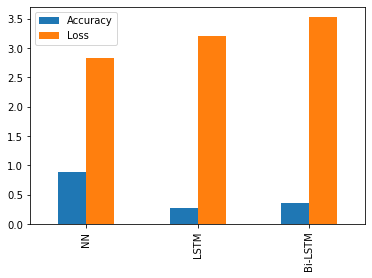

In [79]:
graph_df.plot(kind='bar') 